<a href="https://colab.research.google.com/github/kbariyyah/Python-for-KOS1110/blob/master/Python_MDAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nglview
!pip install MDAnalysis
!pip install MDAnalysisData

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
import math
import nglview as nv
import MDAnalysis as mda
from MDAnalysis.lib import distances 
from MDAnalysis.analysis.lineardensity import LinearDensity

import seaborn as sns

from MDAnalysis.analysis import rdf
from MDAnalysis.analysis.rms import RMSF
import MDAnalysisData as data

In [ ]:
from MDAnalysis.analysis import align
from MDAnalysis.lib import distances
import MDAnalysis as mda
mda.__version__
u = mda.Universe('/md-c36_1.gro', '/md-c36_1_skip.xtc')

#u = mda.Universe(TPR, XTC, in_memory=True)
protein = u.select_atoms("protein")

# TODO: Need to center and make whole (this test trajectory
# contains the protein being split across periodic boundaries
# and the results will be WRONG!)

# Fit to the initial frame to get a better average structure
# (the trajectory is changed in memory)
prealigner = align.AlignTraj(u, u, select="protein and name CA",
                             in_memory=True).run()
# ref = average structure
ref_coordinates = u.trajectory.timeseries(asel=protein).mean(axis=1)
# Make a reference structure (need to reshape into a
# 1-frame "trajectory").
ref = mda.Merge(protein).load_new(ref_coordinates[:, None, :],
                                  order="afc")

Ca = u.select_atoms('type CA')

In [ ]:
print(u)
print(u.atoms)

<Universe with 366677 atoms>
<AtomGroup [<Atom 1: N of type N of resname MET, resid 1 and segid SYSTEM>, <Atom 2: H1 of type H of resname MET, resid 1 and segid SYSTEM>, <Atom 3: H2 of type H of resname MET, resid 1 and segid SYSTEM>, ..., <Atom 366675: NA of type NA of resname NA, resid 119198 and segid SYSTEM>, <Atom 366676: NA of type NA of resname NA, resid 119199 and segid SYSTEM>, <Atom 366677: NA of type NA of resname NA, resid 119200 and segid SYSTEM>]>


In [ ]:
protein=u.atoms.select_atoms('protein')
print(list(protein[:5]))
solvshell =u.atoms.select_atoms("resname SOL and around 5.0 protein")
print(solvshell)
ag=protein+solvshell
print(ag)
protein.residues[10:50]
list(protein.segments)
ag.positions
len(u.trajectory)

[<Atom 1: N of type N of resname MET, resid 1 and segid SYSTEM>, <Atom 2: H1 of type H of resname MET, resid 1 and segid SYSTEM>, <Atom 3: H2 of type H of resname MET, resid 1 and segid SYSTEM>, <Atom 4: H3 of type H of resname MET, resid 1 and segid SYSTEM>, <Atom 5: CA of type C of resname MET, resid 1 and segid SYSTEM>]
<AtomGroup [<Atom 13446: OW of type O of resname SOL, resid 1453 and segid SYSTEM>, <Atom 13447: HW1 of type H of resname SOL, resid 1453 and segid SYSTEM>, <Atom 13448: HW2 of type H of resname SOL, resid 1453 and segid SYSTEM>, ..., <Atom 363884: HW2 of type H of resname SOL, resid 118265 and segid SYSTEM>, <Atom 365655: OW of type O of resname SOL, resid 118856 and segid SYSTEM>, <Atom 365657: HW2 of type H of resname SOL, resid 118856 and segid SYSTEM>]>
<AtomGroup [<Atom 1: N of type N of resname MET, resid 1 and segid SYSTEM>, <Atom 2: H1 of type H of resname MET, resid 1 and segid SYSTEM>, <Atom 3: H2 of type H of resname MET, resid 1 and segid SYSTEM>, ..., <

21

Text(0, 0.5, 'RMSF (Angstroms)')

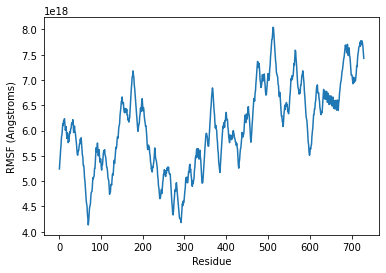

In [ ]:
ca = u.select_atoms("name CA")
means = np.zeros((len(ca), 3))
sumsq = np.zeros_like(means)
for k, ts in enumerate(u.trajectory):
  sumsq += (k/(k+1.0))* (ca.positions- means)**2
  means[:] = (k*means + ca.positions/(k+1.0))
rmsf = np.sqrt(sumsq.sum(axis=1)/(k+1.0))
plt.plot(ca.residues.resids, rmsf)
plt.xlabel("Residue")
plt.ylabel("RMSF (Angstroms)")

In [ ]:
from pmda.rms import RMSF

calphas = protein.select_atoms("protein and name CA")

rmsfer = RMSF(calphas).run()

/usr/local/lib/python3.7/dist-packages/pmda/parallel.py:343: UserWarning: Couldn't guess ideal number of blocks from scheduler. Setting n_blocks=1. Please provide `n_blocks` in call to method.
  "Couldn't guess ideal number of blocks from scheduler. "
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'RMSF (Angstroms)')

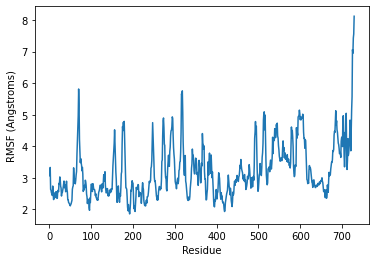

In [ ]:
import matplotlib.pyplot as plt
plt.plot(calphas.resnums, rmsfer.rmsf)
plt.xlabel("Residue")
plt.ylabel("RMSF (Angstroms)")


/usr/local/lib/python3.7/dist-packages/pmda/parallel.py:343: UserWarning: Couldn't guess ideal number of blocks from scheduler. Setting n_blocks=1. Please provide `n_blocks` in call to method.
  "Couldn't guess ideal number of blocks from scheduler. "


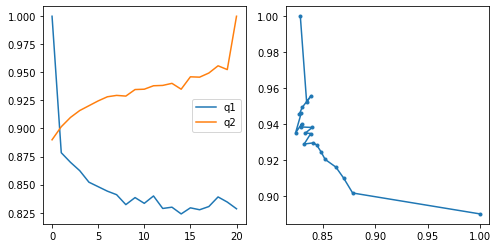

In [ ]:
q1q2 = contacts.q1q2(u.select_atoms('name CA'), radius=8)
q1q2.run()

f, ax = plt.subplots(1, 2, figsize=plt.figaspect(0.5))
ax[0].plot(q1q2.timeseries[:, 0], q1q2.timeseries[:, 1], label='q1')
ax[0].plot(q1q2.timeseries[:, 0], q1q2.timeseries[:, 2], label='q2')
ax[0].legend(loc='best')
ax[1].plot(q1q2.timeseries[:, 1], q1q2.timeseries[:, 2], '.-')
f.show()

In [ ]:
!pip install pmda


In [ ]:
import MDAnalysis.pmda


ModuleNotFoundError: ignored

(729, 16)